In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import math
from keras.datasets import mnist

In [3]:
BASE_IMGS = '/Users/mchrusci/uj/shaper_data/classification/imgs'
BASE_IMGS_TEST_MNIST = '/Users/mchrusci/uj/shaper_data/classification/imgs-test-mnist'
BASE_REPR = '/Users/mchrusci/uj/shaper_data/classification/repr'

In [24]:
def get_accs_from(path):
    accs_files = os.listdir(path)
    accs = np.empty((100,))
    for accs_file in accs_files:
        if not 'txt' in accs_file:
            continue
        n = int(accs_file.split('-')[1].split('.txt')[0])
        with open(os.path.join(path, accs_file)) as f:
            lines = f.readlines()
            acc = float(lines[0][:-1])
            accs[n-1] = acc
    return accs

def plot_train(n, labels=False):
    dataset = f'/Users/mchrusci/uj/shaper_data/mnist/train/train-{n}.npz'
    plot_dataset(labels, dataset)
    
def plot_test(n, labels=False):
    dataset = f'/Users/mchrusci/uj/shaper_data/mnist/test/mnist-test-{n}.npz'
    plot_dataset(labels, dataset)
    
def plot_dataset(labels, dataset):
    with np.load(dataset) as data:
        X = data['drawings']
        Y = data['Y']
    plot(X, Y, labels)
    
def plot_mnist():
    plot(data_mnist(), None, False)
    
def plot(X, Y, labels):
    N = X.shape[0]
    
    if N > 100:
        idxs = np.random.choice(N, 100)
        N = 100
    else:
        idxs = np.arange(N)
        
    root = int(math.sqrt(N))
    
    while N % root != 0:
        root -= 1
    
    cols = N // root
    rows = root
    
    fig_size = (5,10) if labels else (5,5)
    fig = plt.figure(figsize=fig_size)
    
    for r in range(rows):
        for c in range(cols):
            img = X[idxs[c*rows+r]]
            plt.subplot(rows, cols, c*rows+r+1)
            plt.axis('off')
            if labels:
                plt.title(int(Y[idxs[c*rows+r]]))
            plt.imshow(img.reshape(28, 28), cmap='gray')
    
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
def data_mnist():
    (_, _), (X_test, y_test) = mnist.load_data()
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    X_test = X_test.astype('float32')
    X_test /= 255
    return X_test
    

# IMGS

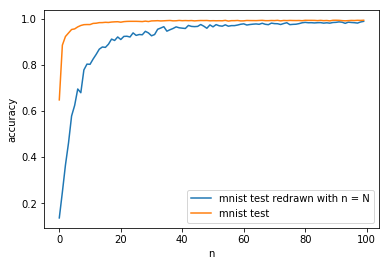

In [61]:
imgs = get_accs_from(BASE_IMGS)
test_mnist = get_accs_from(BASE_IMGS_TEST_MNIST)
plt.plot(imgs)
plt.plot(test_mnist)
plt.xlabel('n')
plt.ylabel('accuracy')
plt.legend(['mnist test redrawn with n = N', 'mnist test'])
plt.show()

Model nauczony na obrazkach n = 1 dokonuje predykcji 64% na oryginalnych danych (n-20 = 88%, n-3 = 92%)  
Jak widać, obrazki te muszą oddawać już jakieś istotne cechy   
Dlaczego przy początkowych n jest spora różnica między predykcją na orgyinalnych danych a na obrazkach? Dla n=1 model uczy się na pojedynczych figurach geometrycznych i radzi sobie lepiej z predykcja faktycznych cyfr niz z predykcja innych figur, ktore pochodza z tego samego rozkladu   

Obrazki, na których uczył się model-1:

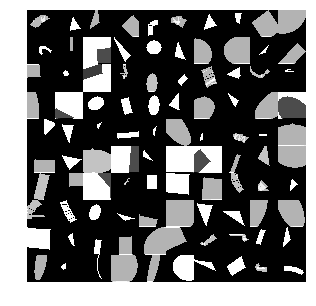

In [10]:
plot_train(1, labels=False)

Obrazki, na których testowany był model-1 (accuracy 0.13)

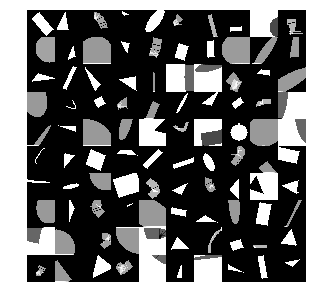

In [15]:
plot_test(1, labels=False)

test mnist, na których testowany był model-1 (accuracy 0.64)

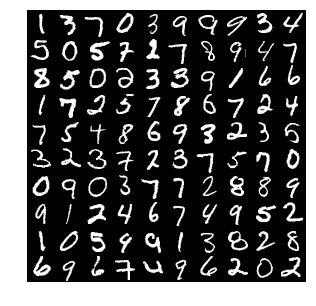

In [25]:
plot_mnist()

Obrazki, na których uczył się model-2 (accuracy 88% na test mniście):

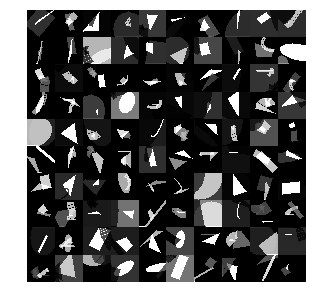

In [27]:
plot_train(2)

Obrazki, na których uczył się model-3 (accuracy 92% na test mniście):

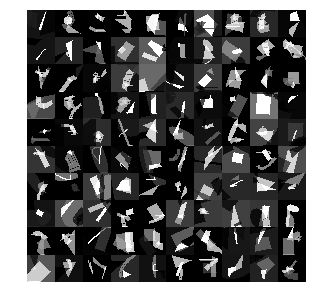

In [28]:
plot_train(3)